## This notebook is to sharpen and finalize the test scores predicting State Failure Events in Any of the Next 5 Years, to visualize its model's permutation importances, and create a map forecasting State Failure Events for each nation in the early 2020's

In [26]:
import pandas as pd

In [27]:
train = pd.read_csv('https://raw.githubusercontent.com/ddodds42/DS_Unit_2_Build_DAVID_DODDS/master/train_github.csv')
val = pd.read_csv('https://raw.githubusercontent.com/ddodds42/DS_Unit_2_Build_DAVID_DODDS/master/val_github.csv')
test = pd.read_csv('https://raw.githubusercontent.com/ddodds42/DS_Unit_2_Build_DAVID_DODDS/master/test_github.csv')

In [28]:
train.columns

Index(['NS_code_from_gini', 'Nation_State', 'T_HDI_Mean_plus_5',
       'T_HDI_Trend_plus_5', 'T_State_Fail_yr_1', 'T_State_Fail_plus_5',
       'T_State_Fail_yr_5', 'year0', 'CWGI_Poli_Stabl_Mean_minus_4',
       'CWGI_Poli_Stabl_Trend_minus_4', 'CWGI_RoL_Mean_minus_4',
       'CWGI_RoL_Trend_minus_4', 'E_GINI_Mean_minus_4', 'E_GINI_Trend_minus_4',
       'PCPI_std_Mean_minus_4', 'PCPI_std_Trend_minus_4',
       'PWGI_Corrupt_Ctrl_Mean_minus_4', 'PWGI_Corrupt_Ctrl_Trend_minus_4',
       'PWGI_Voice_Acct_Mean_minus_4', 'PWGI_Voice_Acct_Trend_minus_4'],
      dtype='object')

In [29]:
features = ['NS_code_from_gini', 'year0', 'CWGI_Poli_Stabl_Mean_minus_4',
       'CWGI_Poli_Stabl_Trend_minus_4', 'CWGI_RoL_Mean_minus_4',
       'CWGI_RoL_Trend_minus_4', 'E_GINI_Mean_minus_4', 'E_GINI_Trend_minus_4',
       'PCPI_std_Mean_minus_4', 'PCPI_std_Trend_minus_4',
       'PWGI_Corrupt_Ctrl_Mean_minus_4', 'PWGI_Corrupt_Ctrl_Trend_minus_4',
       'PWGI_Voice_Acct_Mean_minus_4', 'PWGI_Voice_Acct_Trend_minus_4']
target = 'T_State_Fail_plus_5'

In [30]:
X_train = train[features]
X_val = val[features]
X_test = test[features]

y_train = train[target]
y_val = val[target]
y_test = test[target]

In [31]:
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

## Now let's use XGBoost Classifier to beat the crap outta the baseline of F_score=0.6685.

In [32]:
from xgboost import XGBClassifier

In [33]:
import numpy as np
def f1eval(y_pred, dtrain):
    y_true = dtrain.get_label()
    err = 1-(f1_score(y_true, np.round(y_pred)))
    return 'f1_err', err

encoder = ce.OrdinalEncoder()
X_train_enc = encoder.fit_transform(X_train)
X_val_enc = encoder.transform(X_val)

model = XGBClassifier(
    n_estimators = 1000,
    max_depth = 17,
    learning_rate = 0.08,
    n_jobs = -2,
    disable_default_eval_metric = 1
)

evaluators = [(X_train_enc, y_train),
             (X_val_enc, y_val)]

model.fit(X_train_enc, y_train,
         eval_set = evaluators,
         eval_metric = f1eval,
         early_stopping_rounds = 100)

[0]	validation_0-f1_err:0.117231	validation_1-f1_err:0.281853
Multiple eval metrics have been passed: 'validation_1-f1_err' will be used for early stopping.

Will train until validation_1-f1_err hasn't improved in 100 rounds.
[1]	validation_0-f1_err:0.093168	validation_1-f1_err:0.22179
[2]	validation_0-f1_err:0.072308	validation_1-f1_err:0.225092
[3]	validation_0-f1_err:0.071207	validation_1-f1_err:0.193798
[4]	validation_0-f1_err:0.061824	validation_1-f1_err:0.19084
[5]	validation_0-f1_err:0.057099	validation_1-f1_err:0.195402
[6]	validation_0-f1_err:0.055556	validation_1-f1_err:0.187739
[7]	validation_0-f1_err:0.050926	validation_1-f1_err:0.193916
[8]	validation_0-f1_err:0.050926	validation_1-f1_err:0.18797
[9]	validation_0-f1_err:0.047692	validation_1-f1_err:0.180451
[10]	validation_0-f1_err:0.043812	validation_1-f1_err:0.176923
[11]	validation_0-f1_err:0.04221	validation_1-f1_err:0.158301
[12]	validation_0-f1_err:0.039877	validation_1-f1_err:0.164062
[13]	validation_0-f1_err:0.0374

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1,
              disable_default_eval_metric=1, gamma=0, learning_rate=0.08,
              max_delta_step=0, max_depth=17, min_child_weight=1, missing=None,
              n_estimators=1000, n_jobs=-2, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

## Validation scores shred the baseline. Now, at long last, the predictions vector from the test set...

In [34]:
X_test_enc = encoder.transform(X_test)

In [35]:
preds = model.predict(X_test_enc)
preds

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,

In [36]:
f1_score(preds, y_test)

0.8523489932885905

## Test error for predicting State Failure in any of the next 5 years, with XGBoost Classifier, F_Score = 0.8523489932885905, 18 points better than the baseline!

In [37]:
f20 = pd.read_csv('https://raw.githubusercontent.com/ddodds42/DS_Unit_2_Build_DAVID_DODDS/master/forecast_20s_github.csv')

## Now lets bring in the true test set... the 2019 data that we won't be able to evaluate until 2025!

In [38]:
X_forc = f20[features]

X_forc.shape

(178, 14)

In [39]:
X_forc_enc = encoder.transform(X_forc)

In [40]:
forecasts = model.predict(X_forc_enc)

In [41]:
f20c = pd.DataFrame({
    'NS_code_from_gini':f20.NS_code_from_gini,
    'Nation_State':f20.Nation_State,
    'forecasts':forecasts
})
f20c

,NS_code_from_gini,Nation_State,forecasts
0,AFG,Afghanistan,1
1,ALB,Albania,0
2,DZA,Algeria,0
3,AGO,Angola,0
4,ARG,Argentina,0
...,...,...,...
173,YEM,"Yemen, Rep.",1
174,ZMB,Zambia,0
175,ZWE,Zimbabwe,1
176,SOM,Somalia,1


In [42]:
import plotly.express as px

## Hover over that map, take a good gander at any nation that interests you!

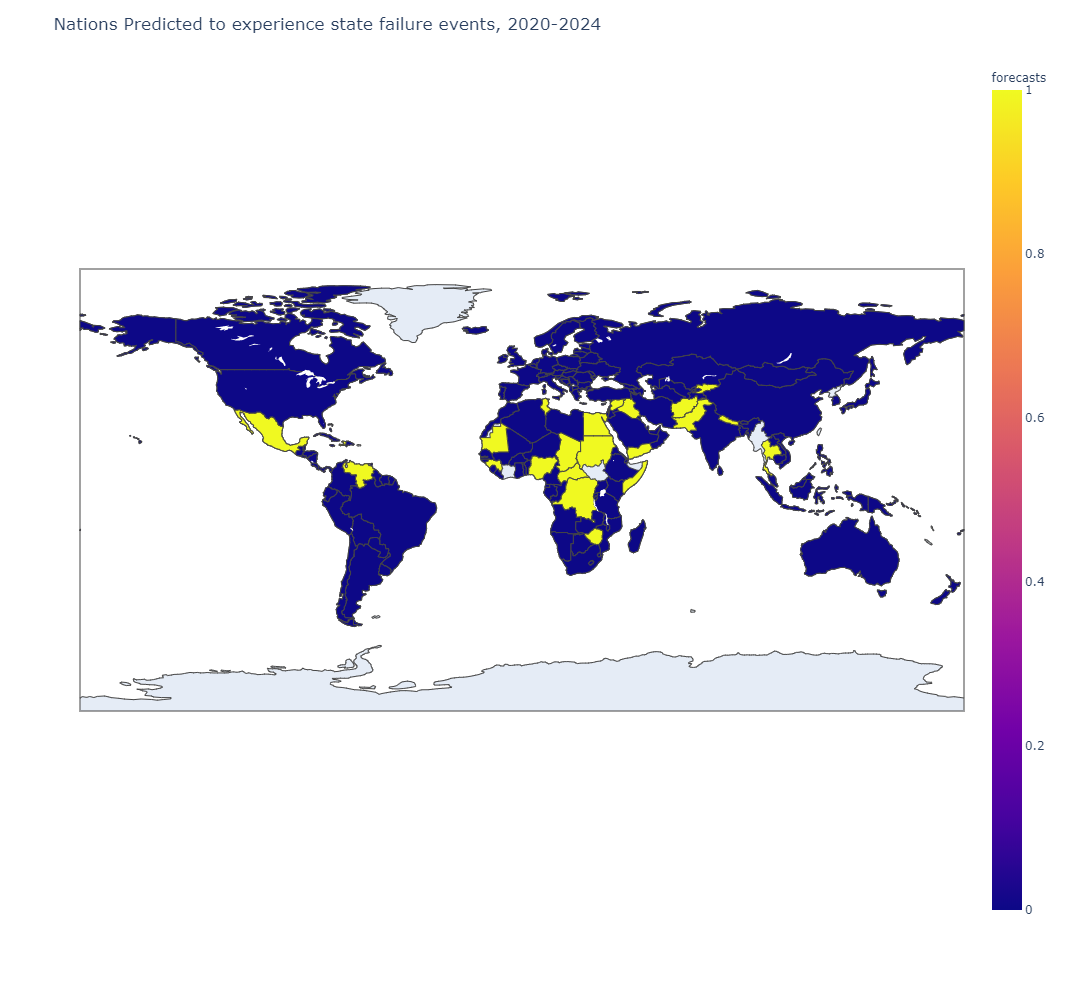

In [43]:
fig = px.choropleth(f20c, locations="NS_code_from_gini",
                    color = "forecasts",
                    hover_name = "Nation_State",
                    color_continuous_scale = px.colors.sequential.Plasma,
                    width = 1500, height=1000)
fig.update_layout(
    title_text = 'Nations Predicted to experience state failure events, 2020-2024')

fig.show()

In [44]:
import eli5
from eli5.sklearn import PermutationImportance

In [45]:
permuter = PermutationImportance(
    model,
    scoring='neg_root_mean_squared_error',
    n_iter=5,
    random_state=42
)

permuter.fit(X_test_enc, y_test)

PermutationImportance(cv='prefit',
                      estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1,
                                              disable_default_eval_metric=1,
                                              gamma=0, learning_rate=0.08,
                                              max_delta_step=0, max_depth=17,
                                              min_child_weight=1, missing=None,
                                              n_estimators=1000, n_jobs=-2,
                                              nthread=None,
                                              objective='binary:logistic',
                                              random_state=0, reg_alpha=0,
                                              reg_lambda=1, scale_pos_weight=1,
          

In [46]:
feature_list = X_test_enc.columns.tolist()

## Permutation Importances for State Failure Events in Any of the Next 5 Years, evaluating the test set.

In [47]:
eli5.show_weights(
    permuter,
    top=None,
    feature_names=feature_list
)

Weight,Feature
0.1714 ± 0.0182,CWGI_Poli_Stabl_Mean_minus_4
0.1086 ± 0.0118,PWGI_Corrupt_Ctrl_Mean_minus_4
0.0624 ± 0.0170,CWGI_RoL_Mean_minus_4
0.0593 ± 0.0079,PCPI_std_Mean_minus_4
0.0425 ± 0.0239,PWGI_Voice_Acct_Mean_minus_4
0.0337 ± 0.0088,E_GINI_Mean_minus_4
0.0304 ± 0.0251,NS_code_from_gini
0.0301 ± 0.0127,CWGI_Poli_Stabl_Trend_minus_4
0.0286 ± 0.0084,PWGI_Voice_Acct_Trend_minus_4
0.0230 ± 0.0053,E_GINI_Trend_minus_4
